In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pickle

In [49]:
features_df = pd.read_csv('extracted_features_pca.csv')

/tmp/ipykernel_3186373/220330452.py:1: DtypeWarning: Columns (424,425,440,441,446,447,450,451,452,453,454,455,456,457,458,459,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,544,545,550,551,554,555,556,557,560,561,562,563,564,565,570,571,578,579) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv('extracted_features_pca.csv')


In [50]:

# Separate features, labels, and filenames
X = features_df.drop(columns=['label', 'filename']).select_dtypes(include=[np.number]).values
print(X.shape)

y = LabelEncoder().fit_transform(features_df['label'].values)
file_names = features_df['filename'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

(12600, 446)


In [51]:
print(X.shape)

(12600, 446)


In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [58]:
print(X_train.shape)

(10080, 446)


In [64]:
best_rf_params = {
    "n_estimators": 1000,
    "min_samples_split": 10,
    "max_features":'sqrt',
    "max_depth":30,
    "random_state": 42,
    "n_jobs": -1

}

rf = RandomForestClassifier(**best_rf_params)
rf.fit(X_train, y_train)

# Test the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.4f}")

Random Forest Model Accuracy: 0.4853


In [66]:
from sklearn.tree import DecisionTreeClassifier

best_dt_params = {
    "max_depth": 30,
    "min_samples_split": 10,
    "random_state": 42
}

dt = DecisionTreeClassifier(**best_dt_params)
dt.fit(X_train, y_train)

# Test the model
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}")


Decision Tree Model Accuracy: 0.3587


In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create a pipeline with imputation and Naive Bayes
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('nb', GaussianNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Test the model
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy:.4f}")

Naive Bayes Model Accuracy: 0.4083


In [60]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create a pipeline with imputation and Perceptron
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('perceptron', Perceptron(max_iter=1000, tol=1e-3, random_state=42))
])

# Train the Perceptron model
pipeline.fit(X_train, y_train)

# Test the model
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Model Accuracy: {accuracy:.4f}")

Perceptron Model Accuracy: 0.4214


In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create a pipeline with imputation and MLPClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

# Train the MLP model
pipeline.fit(X_train, y_train)

# Test the model
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Multilayer Perceptron Model Accuracy: {accuracy:.4f}")

Multilayer Perceptron Model Accuracy: 0.4528


In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create individual classifiers
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('naive_bayes', nb),
    ('decision_tree', dt),
    ('random_forest', rf),
    ('perceptron', perceptron)
], voting='hard')  # Use 'soft' for probabilistic voting

# Create a pipeline with imputation and the ensemble classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('voting_clf', voting_clf)
])

# Train the ensemble model
pipeline.fit(X_train, y_train)

# Test the model
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.4556


edges shape: (50000,), orb_features shape: (4096,), hog_features shape: (3888,), lbp_features shape: (10,), color_histogram shape: (512,)

In [54]:
# model_filename = 'trained_random_forest_model.pkl'
# with open(model_filename, 'rb') as file:
#     loaded_model = pickle.load(file)

# importances = loaded_model.feature_importances_

importances = rf.feature_importances_

# Define feature sizes
edges_size = 100
orb_size = 0
hog_size = 3888
lbp_size = 30
color_histogram_size = 768  # Assuming 256 bins for each of B, G, R channels

# Sizes for new features
harris_size = 100  # Assuming PCA reduced Harris features to 100
gabor_size = 100   # Assuming PCA reduced Gabor features to 100
sobel_size = 100   # Assuming PCA reduced Sobel features to 100
gftt_size = 200    # Assuming PCA reduced GFTT features to 100
glcm_size = 256 

# Split importances back into the respective feature categories
edges_importance = importances[:edges_size]
orb_importance = importances[edges_size:edges_size + orb_size]
hog_importance = importances[edges_size + orb_size:edges_size + orb_size + hog_size]
lbp_importance = importances[edges_size + orb_size + hog_size:edges_size + orb_size + hog_size + lbp_size]
color_histogram_importance = importances[edges_size + orb_size + hog_size + lbp_size:edges_size + orb_size + hog_size + lbp_size + color_histogram_size]

# Adding Harris, Gabor, Sobel, and GFTT features
start_idx = edges_size + orb_size + hog_size + lbp_size + color_histogram_size
harris_importance = importances[start_idx:start_idx + harris_size]
gabor_importance = importances[start_idx + harris_size:start_idx + harris_size + gabor_size]
sobel_importance = importances[start_idx + harris_size + gabor_size:start_idx + harris_size + gabor_size + sobel_size]
gftt_importance = importances[start_idx + harris_size + gabor_size + sobel_size:start_idx + harris_size + gabor_size + sobel_size + gftt_size]
glcm_importance = importances[start_idx + harris_size + gabor_size + sobel_size + gftt_size:start_idx + harris_size + gabor_size + sobel_size + gftt_size + glcm_size]

# Sum the importances for each category
category_importances = {
    'edges': (np.sum(edges_importance), edges_size),
    'orb_features': (np.sum(orb_importance), orb_size),
    'hog_features': (np.sum(hog_importance), hog_size),
    'lbp_features': (np.sum(lbp_importance), lbp_size),
    'color_histogram': (np.sum(color_histogram_importance), color_histogram_size),
    'harris_features': (np.sum(harris_importance), harris_size),
    'gabor_features': (np.sum(gabor_importance), gabor_size),
    'sobel_features': (np.sum(sobel_importance), sobel_size),
    'gftt_features': (np.sum(gftt_importance), gftt_size),
    'glcm_features': (np.sum(glcm_importance), glcm_size)
}

# Convert to pandas DataFrame for easier viewing
category_importances_df = pd.DataFrame(category_importances, index=['Importance', 'Feature Count']).T

# Print the importances by category and feature count
print(category_importances_df.sort_values(by='Importance', ascending=False))

                 Importance  Feature Count
hog_features       0.735641         3888.0
edges              0.264359          100.0
orb_features       0.000000            0.0
lbp_features       0.000000           30.0
color_histogram    0.000000          768.0
harris_features    0.000000          100.0
gabor_features     0.000000          100.0
sobel_features     0.000000          100.0
gftt_features      0.000000          200.0
glcm_features      0.000000          256.0


In [55]:
# Save the model to a file
model_filename = 'trained_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

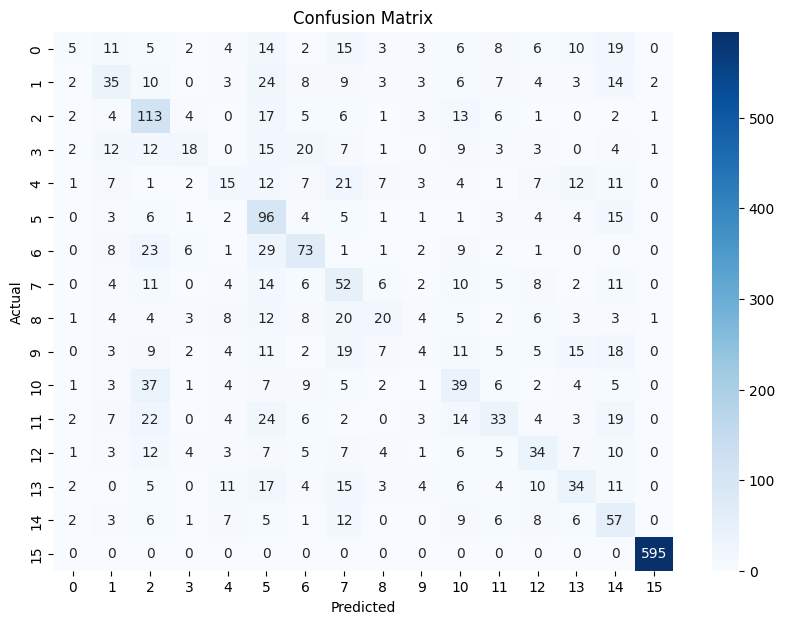

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
